<a href="https://colab.research.google.com/github/eddiebenchan/ACL_White_Sox/blob/master/ACL_White_Sox_Model_Building_%5BConcession_REVENUE%5D_Breakdown_with_F4P%2C_BNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##imports
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
##add the csvs 
uploaded = files.upload()

Saving B&B and F4P Data_Eddie.csv to B&B and F4P Data_Eddie.csv
Saving Chicago_weather.csv to Chicago_weather.csv
Saving White Sox Attendance by game 2016-2019.csv to White Sox Attendance by game 2016-2019.csv
Saving White Sox Promotions 2016-2019.csv to White Sox Promotions 2016-2019.csv
Saving White Sox Records.csv to White Sox Records.csv


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
## save to pandas
bnb_f4p = pd.read_csv(io.StringIO(uploaded['B&B and F4P Data_Eddie.csv'].decode('utf-8')))
attendance_2016_2019 = pd.read_csv(io.StringIO(uploaded['White Sox Attendance by game 2016-2019.csv'].decode('utf-8')))
promo_2016_2019 = pd.read_csv(io.StringIO(uploaded['White Sox Promotions 2016-2019.csv'].decode('utf-8')))
rev_2016 = pd.read_csv("/content/gdrive/My Drive/ACL Data/FoodRetailDetail2016v2.csv")
rev_2017 = pd.read_csv("/content/gdrive/My Drive/ACL Data/FoodRetailDetail2017v2.csv")
rev_2018 = pd.read_csv("/content/gdrive/My Drive/ACL Data/FoodRetailDetail2018.csv")
rev_2019 = pd.read_csv("/content/gdrive/My Drive/ACL Data/FoodRetailDetail2019.csv")
records = pd.read_csv(io.StringIO(uploaded['White Sox Records.csv'].decode('utf-8')))
weather = pd.read_csv(io.StringIO(uploaded['Chicago_weather.csv'].decode('utf-8')))




/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,15,16,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
rev_2016_concessions = rev_2016.loc[rev_2016["Source"].isin(['FoodRetailAPI_quest','Concessions'])]
rev_2016_concessions_bnb = rev_2016_concessions.loc[rev_2016_concessions["LocationKey"].isin([1253, 1265, 1274, 1276, 1289, 1297, 1303, 1310, 1311, 1317, 1318, 1319, 1338, 1346, 1354, 1357, 1360, 1367, 1384, 1385, 1387, 1397, 1421])]
rev_2016_concessions_f4p = rev_2016_concessions.loc[rev_2016_concessions["LocationKey"].isin([1267, 1278, 1294, 1302, 1305, 1310, 1315, 1316, 1357, 1358, 1360, 1365, 1384, 1387, 1396, 1397, 1422, 1429])]
rev_2016_retail = rev_2016.loc[rev_2016["Source"].isin(['FoodRetailAPI_rpro','Retail'])]
rev_2016_concessions_bnb = rev_2016_concessions_bnb.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2016_concessions_f4p = rev_2016_concessions_f4p.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2016_concesions = rev_2016_concessions.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()

rev_2017_concessions = rev_2017.loc[rev_2017["Source"].isin(['FoodRetailAPI_quest','Concessions'])]
rev_2017_concessions_bnb = rev_2017_concessions.loc[rev_2017_concessions["LocationKey"].isin([1253, 1265, 1274, 1276, 1289, 1297, 1303, 1310, 1311, 1317, 1318, 1319, 1338, 1346, 1354, 1357, 1360, 1367, 1384, 1385, 1387, 1397, 1421])]
rev_2017_concessions_f4p = rev_2017_concessions.loc[rev_2017_concessions["LocationKey"].isin([1267, 1278, 1294, 1302, 1305, 1310, 1315, 1316, 1357, 1358, 1360, 1365, 1384, 1387, 1396, 1397, 1422, 1429])]
rev_2017_retail = rev_2017.loc[rev_2017["Source"].isin(['FoodRetailAPI_rpro','Retail'])]
rev_2017_concessions = rev_2017_concessions.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2017_concessions_bnb = rev_2017_concessions_bnb.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2017_concessions_f4p = rev_2017_concessions_f4p.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()

rev_2018_concessions = rev_2018.loc[rev_2018["Source"].isin(['FoodRetailAPI_quest','Concessions'])]
rev_2018_concessions_bnb = rev_2018_concessions.loc[rev_2018_concessions["LocationKey"].isin([1253, 1265, 1274, 1276, 1289, 1297, 1303, 1310, 1311, 1317, 1318, 1319, 1338, 1346, 1354, 1357, 1360, 1367, 1384, 1385, 1387, 1397, 1421])]
rev_2018_concessions_f4p = rev_2018_concessions.loc[rev_2018_concessions["LocationKey"].isin([1267, 1278, 1294, 1302, 1305, 1310, 1315, 1316, 1357, 1358, 1360, 1365, 1384, 1387, 1396, 1397, 1422, 1429])]
rev_2018_retail = rev_2018.loc[rev_2018["Source"].isin(['FoodRetailAPI_rpro','Retail'])]
rev_2018_concessions = rev_2018_concessions.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2018_concessions_bnb = rev_2018_concessions_bnb.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2018_concessions_f4p = rev_2018_concessions_f4p.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()

rev_2019_concessions = rev_2019.loc[rev_2019["Source"].isin(['FoodRetailAPI_quest','Concessions'])]
rev_2019_concessions_bnb = rev_2019_concessions.loc[rev_2019_concessions["LocationKey"].isin([1253, 1265, 1274, 1276, 1289, 1297, 1303, 1310, 1311, 1317, 1318, 1319, 1338, 1346, 1354, 1357, 1360, 1367, 1384, 1385, 1387, 1397, 1421])]
rev_2019_concessions_f4p = rev_2019_concessions.loc[rev_2019_concessions["LocationKey"].isin([1267, 1278, 1294, 1302, 1305, 1310, 1315, 1316, 1357, 1358, 1360, 1365, 1384, 1387, 1396, 1397, 1422, 1429])]
rev_2019_retail = rev_2019.loc[rev_2019["Source"].isin(['FoodRetailAPI_rpro','Retail'])]
rev_2019_concessions = rev_2019_concessions.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2019_concessions_bnb = rev_2019_concessions_bnb.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()
rev_2019_concessions_f4p = rev_2019_concessions_f4p.groupby("DateKey")["ExtendedPrIceTaxIncluded"].sum()

In [0]:
## adjust columns
promo_2016_2019["game_date"] = pd.DatetimeIndex(promo_2016_2019['game_time_local']).date
attendance_2016_2019.EventDate = pd.to_datetime(attendance_2016_2019.EventDate)
promo_2016_2019.game_date = pd.to_datetime(promo_2016_2019.game_date)
attendance_2016_2019 = attendance_2016_2019.rename(columns={' PaidIssued ': 'PaidIssued'})
attendance_2016_2019 = attendance_2016_2019.rename(columns={' TotalScans ': 'TotalScans'})
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].str.strip()
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].str.strip()
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].replace("-", 0)
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].replace("-", 0)
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].str.replace(",","").astype(float)
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].str.replace(",","").astype(float)
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].fillna(0)
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].fillna(0)
records['Date'] = pd.to_datetime(records.Date)
weather['DATE'] = pd.to_datetime(weather.DATE)

records['Wins'] = records['Wins'].astype(str).astype(float)
records['Losses'] = records['Losses'].astype(str).astype(float)
records['Win_pct'] = records['Win_pct'].astype(str).str.strip('%').astype(float)
weather["PRCP"] = weather["PRCP"].fillna(0)
weather["temp_avg"] = weather["temp_avg"].fillna(0)
weather["TMAX"] = weather["TMAX"].fillna(0)
weather["TMIN"] = weather["TMIN"].fillna(0)

In [0]:
##concession_revenue = rev_2016_concessions.append(rev_2017_concessions)
##concession_revenue = concession_revenue.append(rev_2018_concessions)
##concession_revenue = concession_revenue.append(rev_2019_concessions)
##concession_revenue = concession_revenue.rename('concession_rev')

concession_revenue_bnb = rev_2016_concessions_bnb.append(rev_2017_concessions_bnb)
concession_revenue_bnb = concession_revenue_bnb.append(rev_2018_concessions_bnb)
concession_revenue_bnb = concession_revenue_bnb.append(rev_2019_concessions_bnb)
concession_revenue_bnb = concession_revenue_bnb.rename('concession_rev_bnb')

concession_revenue_f4p = rev_2016_concessions_f4p.append(rev_2017_concessions_f4p)
concession_revenue_f4p = concession_revenue_f4p.append(rev_2018_concessions_f4p)
concession_revenue_f4p = concession_revenue_f4p.append(rev_2019_concessions_f4p)
concession_revenue_f4p = concession_revenue_f4p.rename('concession_rev_f4p')

##retail_revenue = rev_2016_retail.append(rev_2017_retail)
##retail_revenue = retail_revenue.append(rev_2018_retail)
##retail_revenue = retail_revenue.append(rev_2019_retail)
##retail_revenue = retail_revenue.rename('retail_rev')

In [0]:
##merging to a single dataframe
attendance = pd.merge(attendance_2016_2019, bnb_f4p, left_on = ("Season", "EventName"), right_on = ("Year", "Event Name"), how = 'left')
##attendance = pd.merge(attendance, promo_2016_2019, left_on = ("EventDate"), right_on = ("game_date"), how = 'left')
##attendance = pd.merge(attendance, concession_revenue, left_on = ("EventDateKey"), right_on = ("DateKey"), how = 'left')
##attendance = pd.merge(attendance, retail_revenue, left_on = ("EventDateKey"), right_on = ("DateKey"), how = 'left')
attendance = pd.merge(attendance, concession_revenue_bnb, left_on = ("EventDateKey"), right_on = ("DateKey"), how = 'left')
attendance = pd.merge(attendance, concession_revenue_f4p, left_on = ("EventDateKey"), right_on = ("DateKey"), how = 'left')
attendance = pd.merge(attendance, records, left_on = "EventDate", right_on = "Date", how = "left")
attendance = pd.merge(attendance, weather, left_on = "EventDate", right_on = "DATE", how = "left")

##add columns
attendance['f4p_y_n'] = attendance['F4P Sold'].apply(lambda x: '1' if x > 0 else '0')
attendance['b_b_y_n'] = attendance['B&B Sold'].apply(lambda x: '1' if x > 0 else '0')
attendance["F4P Sold"] = attendance["F4P Sold"].fillna(0)
attendance["B&B Sold"] = attendance["B&B Sold"].fillna(0)
attendance["Wins"] = attendance["Wins"].fillna(0)
attendance["Losses"] = attendance["Losses"].fillna(0)
attendance["Season Rolling Average Runs"] = attendance["Season Rolling Average Runs"].fillna(0)
attendance["PRCP"] = attendance["PRCP"].fillna(0)
attendance["temp_avg"] = attendance["temp_avg"].fillna(0)
attendance["TMAX"] = attendance["TMAX"].fillna(0)
attendance["TMIN"] = attendance["TMIN"].fillna(0)
attendance["Win_pct"] = attendance["Win_pct"].fillna(0)
##attendance["concession_rev"] = attendance["concession_rev"].fillna(0)
##attendance["retail_rev"] = attendance["retail_rev"].fillna(0)

##a = ['RAINED OUT 5/27', 'ST. LOUIS CARDINALS', 'PITTSBURGH PIRATES', 'PHILADELPHIA PHILLIES', 'LOS ANGELES DODGERS', 
##     'ATLANTA BRAVES', 'SF GIANTS', 'SAN DIEGO PADRES', 'NEW YORK METS', 'MILWAUKEE BREWERS', 'MIAMI MARLINS', 'NY YANKEES', 'WASHINGTON NATIONALS', 'CHICAGO CUBS']
##attendance = attendance.replace(to_replace = ['RAINED OUT 5/27', 'ST. LOUIS CARDINALS', 'PITTSBURGH PIRATES', 'PHILADELPHIA PHILLIES', 'LOS ANGELES DODGERS', 
##     'ATLANTA BRAVES', 'SF GIANTS', 'SAN DIEGO PADRES', 'NEW YORK METS', 'MILWAUKEE BREWERS', 'MIAMI MARLINS', 'NY YANKEES', 'WASHINGTON NATIONALS', 'CHICAGO CUBS'],
##     value = "Other")

##Rain Outs to Remove: 4/10/2016, 4/5/2017, 5/8/2017, 5/10/2017
##Doubleheaders to Remove: 5/23/2016, 5/27/2017, 8/21/2017, 4/28/2018. 6/5/2018, 6/22/2018, 9/28/2018, 5/1/2019, 7/3/2019, 8/6/2019, 8/13/2019, 9/28/2019,
dates = [20160410, 20170405, 20170508, 20170510, 20160523, 20170527, 20170821, 20180428, 20180605, 20180622, 20180928, 20190501, 20190703, 20190806, 20190813, 20190928]
attendance = attendance[~attendance['EventDateKey'].isin(dates)]
attendance_bnb = attendance[attendance['concession_rev_bnb'].notna()]
attendance_f4p = attendance[attendance['concession_rev_f4p'].notna()]

In [0]:
attendance_bnb.columns

Index(['Season', 'EventName', 'EventDateKey', 'EventDate', 'Team', 'DayName',
       'MonthName', 'TotalScans', 'PaidIssued', 'Year', 'Event Name',
       'B&B Sold', 'F4P Sold', 'Unnamed: 4', 'concession_rev_bnb',
       'concession_rev_f4p', 'Date', 'Day_Night', 'Wins', 'Losses',
       'Occurences', 'RunsScored', 'Season Rolling Average Runs', 'Win_pct',
       'STATION', 'NAME', 'DATE', 'DATEKEY', 'PRCP', 'TMAX', 'TMIN',
       'temp_avg', 'f4p_y_n', 'b_b_y_n'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from IPython.display import Image 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


X = attendance_bnb.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'concession_rev_bnb', 'concession_rev_f4p', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance_bnb.concession_rev_bnb


In [0]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
Xscaled = add_constant(Xscaled)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
lin_model = OLS(y_train, X_train).fit()

lin_pred = lin_model.predict(X_test)
lin_model_score = r2_score(y_test, lin_pred)

print ("R^2 score:", lin_model_score)


R^2 score: 0.5564718612304824


In [0]:
def evaluate(model):        
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_score = r2_score(y_test, pred)
    
    s = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
        
    print ("R^2 score:", model_score)
    print ("Cross Validation Score: {:0.5} ± {:0.5}".format(s.mean().round(5), s.std().round(5)))
    
  
    errors = abs(pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    df = pd.DataFrame(columns=['attendance', 'predictions', 'residuals'])
    df.attendance = y
    df.predictions = model.predict(Xscaled)
    df.residuals = df.attendance - df.predictions
    df.plot(x='predictions', y='residuals', kind='scatter')
    plt.show()

In [0]:
def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False).reset_index()
    print (feature_importances)
    return feature_importances

R^2 score: 0.3380428496676322
Cross Validation Score: 0.20747 ± 0.30609
Model Performance
Average Error: 28499.6200 degrees.
Accuracy = 51.38%.


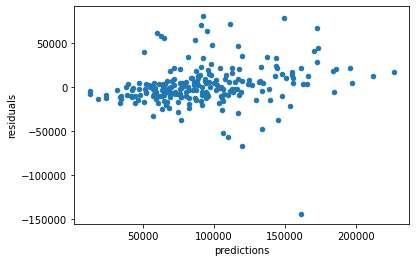

CPU times: user 917 ms, sys: 296 ms, total: 1.21 s
Wall time: 5.73 s


In [0]:
## Random Forest
X = attendance_bnb.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'concession_rev_bnb', 'concession_rev_f4p', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance_bnb.concession_rev_bnb

ss = StandardScaler()
Xscaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
rf = RandomForestRegressor(n_estimators=300)
%time evaluate(rf)
##.65

In [0]:
rf_featimp = feat_imp(rf)


                          index  importance
0             Team_CHICAGO CUBS    0.185961
1              DayName_Saturday    0.137915
2   Season Rolling Average Runs    0.110008
3                       Win_pct    0.078526
4                          Wins    0.078470
5                MonthName_July    0.067335
6                          TMAX    0.044022
7                        Losses    0.042076
8           Team_BOSTON RED SOX    0.037707
9                      temp_avg    0.035514
10                         TMIN    0.020978
11               DayName_Friday    0.015972
12                         PRCP    0.014618
13              MonthName_April    0.012608
14               DayName_Sunday    0.012071
15              DayName_Tuesday    0.010439
16                       Season    0.010052
17         Team_MINNESOTA TWINS    0.007699
18                    f4p_y_n_1    0.006245
19      Team_KANSAS CITY ROYALS    0.005831
20              Day_Night_night    0.005724
21                Day_Night_day 

In [0]:
 def rf_rs():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}
    print(random_grid)
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_, rf_random.best_score_)

In [0]:
%time rf_rs()

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min


{'n_estimators': 155, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} 0.3732515061938235
CPU times: user 1.45 s, sys: 41 ms, total: 1.49 s
Wall time: 2min 56s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


In [0]:
def rf_gs():
    params = {
        'max_features' : [1, 2,'auto', 'sqrt'],
        'max_depth' : [20, 30, 50, 60, None],
        'n_estimators' : [150, 250, 261, 350, 400],
        'min_samples_split' : [1,2,3,4,5],
        'min_samples_leaf' : [1,2],
        'bootstrap' : [False]
    }

    gs_rf = GridSearchCV(rf, params, n_jobs=-1, cv=5)
    gs_rf.fit(X_train, y_train)

    print (gs_rf.best_params_, gs_rf.best_score_)

In [0]:
%time rf_gs()


{'bootstrap': False, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150} 0.5044479554135652
CPU times: user 20.4 s, sys: 770 ms, total: 21.2 s
Wall time: 20min 22s


In [0]:
rf2 = RandomForestRegressor(n_estimators=150, max_features='sqrt' , max_depth= 60, min_samples_leaf= 1, min_samples_split= 3)

##r^2 = .649 (n_estimators=35, max_features='auto' , max_depth= None, min_samples_leaf= 1, min_samples_split= 2)

R^2 score: 0.3676366306038218
Cross Validation Score: 0.26381 ± 0.22065
Model Performance
Average Error: 29798.7473 degrees.
Accuracy = 48.25%.


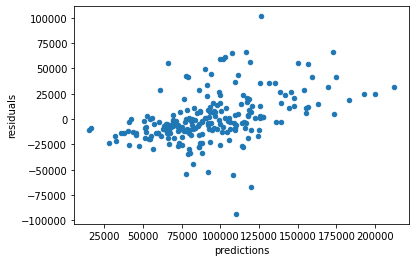

CPU times: user 518 ms, sys: 91 ms, total: 609 ms
Wall time: 1.43 s


In [0]:
%time evaluate(rf2)


In [0]:
rf2_featimp = feat_imp(rf2)


                          index  importance
0                       Win_pct    0.091333
1             Team_CHICAGO CUBS    0.086998
2              DayName_Saturday    0.083442
3                        Losses    0.077107
4   Season Rolling Average Runs    0.076233
5                          Wins    0.065848
6                      temp_avg    0.060294
7                          TMIN    0.056696
8                          TMAX    0.055442
9                MonthName_July    0.051749
10              DayName_Tuesday    0.021619
11                         PRCP    0.021077
12          Team_BOSTON RED SOX    0.020702
13              MonthName_April    0.018864
14                       Season    0.018347
15                    f4p_y_n_0    0.013648
16                    f4p_y_n_1    0.013584
17              Day_Night_night    0.010500
18                Day_Night_day    0.010218
19               DayName_Friday    0.009725
20               DayName_Monday    0.009133
21       Team_BALTIMORE ORIOLES 

R^2 score: 0.38947056315668105
Cross Validation Score: 0.41807 ± 0.21044
Model Performance
Average Error: 27166.3964 degrees.
Accuracy = 48.63%.


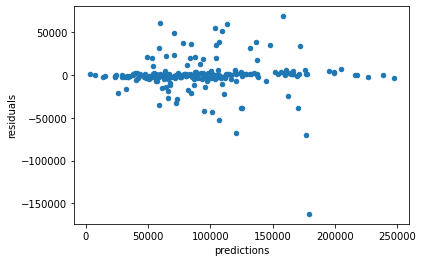

CPU times: user 446 ms, sys: 297 ms, total: 742 ms
Wall time: 3.06 s


In [0]:
##Gradient Boosting Regressor

X = attendance_bnb.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'concession_rev_bnb', 'concession_rev_f4p', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance_bnb.concession_rev_bnb
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
gbr = GradientBoostingRegressor(n_estimators=300)
%time evaluate(gbr)
##R^2 = 0.6677

In [0]:
def gbr_gs():
    params = {
        'max_features' : [0.5, 0.75,3,5,7, 'auto', 'sqrt'],
        'max_depth' : [3,4,6,20, 30, None],
        'n_estimators' : [10, 20, 50, 100,200,300],
        'min_samples_split' : [1,2,3],
        'min_samples_leaf' : [1,2,3],
        ##'max_features' : [0.75, 'auto', 'sqrt'],
        ##'max_depth' : [30, 40,None],
        ##'n_estimators' : [200, 300],
        ##'min_samples_split' : [2],
        ##'min_samples_leaf' : [2],
        'learning_rate' : [0.15,0.1,0.05,0.01],
    }

    gs_gbr = GridSearchCV(gbr, params, n_jobs=-1, cv=5)
    gs_gbr.fit(X_train, y_train)

    print (gs_gbr.best_params_, gs_gbr.best_score_)

In [0]:
%time gbr_gs()


{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} 0.6158298102556256
CPU times: user 1min 1s, sys: 1.07 s, total: 1min 2s
Wall time: 26min 19s


R^2 score: 0.4682774442893899
Cross Validation Score: 0.39958 ± 0.21783
Model Performance
Average Error: 26220.0300 degrees.
Accuracy = 57.39%.


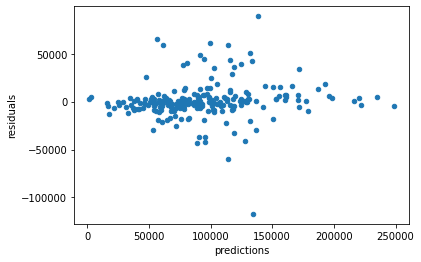

CPU times: user 298 ms, sys: 108 ms, total: 406 ms
Wall time: 623 ms


In [0]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_features= 3, max_depth=3, min_samples_leaf= 1, min_samples_split= 2, learning_rate=0.1)
%time evaluate(gbr2)

##R^2 = 0.68651 (n_estimators=400, max_features= 'sqrt', max_depth=6, min_samples_leaf= 1, min_samples_split= 3, learning_rate=0.1)
##R^2 = 0.68651 (n_estimators=100, max_features= 'sqrt', max_depth=4, min_samples_leaf= 3, min_samples_split= 3, learning_rate=0.1)

In [0]:
gbr2_featimp = feat_imp(gbr2)


                          index  importance
0             Team_CHICAGO CUBS    0.107688
1   Season Rolling Average Runs    0.101747
2              DayName_Saturday    0.091585
3                MonthName_July    0.085096
4                       Win_pct    0.075840
5                        Losses    0.059035
6                      temp_avg    0.056737
7           Team_BOSTON RED SOX    0.046333
8                          Wins    0.045521
9               DayName_Tuesday    0.029982
10                         TMIN    0.027856
11                         TMAX    0.026856
12                         PRCP    0.022572
13                       Season    0.022300
14              MonthName_April    0.020236
15               DayName_Monday    0.017636
16                    f4p_y_n_1    0.013917
17       Team_OAKLAND ATHLETICS    0.012252
18              Day_Night_night    0.011877
19       Team_MILWAUKEE BREWERS    0.009703
20      Team_KANSAS CITY ROYALS    0.009628
21                    f4p_y_n_0 

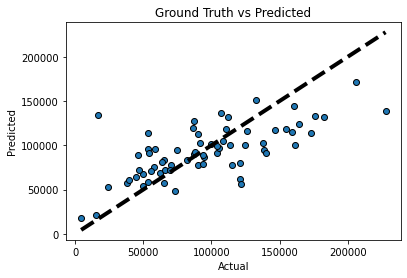

In [0]:
y_predicted = gbr2.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [0]:
X

,Season,Wins,Losses,Season Rolling Average Runs,Win_pct,PRCP,TMAX,TMIN,temp_avg,Team_BALTIMORE ORIOLES,Team_BOSTON RED SOX,Team_CHICAGO CUBS,Team_CLEVELAND INDIANS,Team_DETROIT TIGERS,Team_HOUSTON ASTROS,Team_KANSAS CITY ROYALS,Team_LOS ANGELES ANGELS,Team_LOS ANGELES DODGERS,Team_MIAMI MARLINS,Team_MILWAUKEE BREWERS,Team_MINNESOTA TWINS,Team_NEW YORK METS,Team_NEW YORK YANKEES,Team_NY YANKEES,Team_OAKLAND ATHLETICS,Team_PITTSBURGH PIRATES,Team_RAINED OUT 5/27,Team_SAN DIEGO PADRES,Team_SEATTLE MARINERS,Team_SF GIANTS,Team_ST. LOUIS CARDINALS,Team_TAMPA BAY RAYS,Team_TEXAS RANGERS,Team_TORONTO BLUE JAYS,Team_WASHINGTON NATIONALS,DayName_Friday,DayName_Monday,DayName_Saturday,DayName_Sunday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,MonthName_April,MonthName_August,MonthName_July,MonthName_June,MonthName_May,MonthName_September,Day_Night_day,Day_Night_night,f4p_y_n_0,f4p_y_n_1,b_b_y_n_0,b_b_y_n_1
82,2017,0.0,1.0,3.000000,0.0000,0.00,56.0,46.0,51.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0
84,2017,1.0,1.0,7.000000,50.0000,0.50,52.0,38.0,45.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
85,2017,27.0,35.0,4.483871,43.5484,0.00,95.0,74.0,84.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
86,2017,1.0,2.0,5.000000,33.3333,0.00,54.0,37.0,45.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
87,2017,41.0,63.0,4.355769,39.4231,0.00,86.0,71.0,78.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2019,69.0,88.0,4.320513,43.9490,0.00,80.0,65.0,72.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1
324,2019,70.0,88.0,4.343949,44.3038,0.00,73.0,57.0,65.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1
325,2019,72.0,89.0,4.381250,44.7205,0.99,69.0,62.0,65.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
328,2019,27.0,29.0,4.290909,48.2143,0.12,80.0,61.0,70.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1


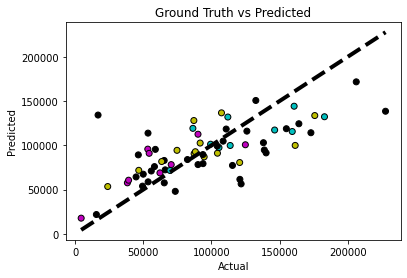

In [0]:
df = ss.inverse_transform(X_test)
df = pd.DataFrame(df)      
df[54] = np.where(df[53]==1,'y','k') ##bleachers and brews
df[55] = np.where(df[51]==1,'r','k') ##f4p 

def f(row):
    if row[54] == 'y':
        if row[55] == 'r':
          val = 'y' ##both
        else:
          val = 'm' ##bnb
    elif row[55] == 'r':
        val = 'c'  ## f4P
    else:
        val = 'k'
    return val

df[56] = df.apply(f,axis =1)

colors = df[56]

y_predicted = gbr2.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, c=colors,edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


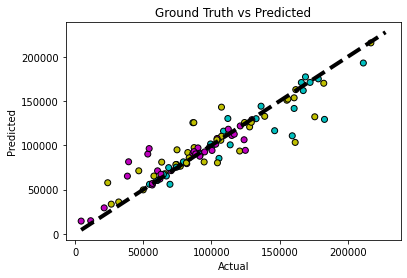

In [0]:

df2 = X.copy()
##df2 = ss.inverse_transform(df2)
##df2 = pd.DataFrame(df2)      

##df2[57] = np.where(df2['b_b_y_n_0']==0,'y','k') ##bleachers and brews
##df2[58] = np.where(df2['f4p_y_n_0']==0,'r','k') ##f4p 

def f(row):
    if row[53] == 1:
        if row[51] == 1:
          val = 'y' ## both
        else:
          val = 'm' ## bleachers n brews
    elif row[51] == 1:
        val = 'c' ##f4p
    else:
        val = 'k' ##none
    return val

df2[54] = df2.apply(f,axis =1)



y_predicted_full = gbr2.predict(Xscaled)
df2['pred']=y_predicted_full
df2['actuals'] =y
df2=df2.loc[df2[54]!='k']
colors2 = df2[54]

fig, ax = plt.subplots()
ax.scatter(df2['actuals'], df2['pred'],c=colors2, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [0]:

attendance.to_csv('Concession Revenue Model Data.csv')
files.download('Concession Revenue Model Data.csv')

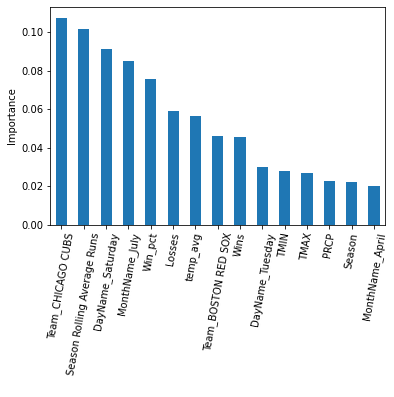

In [0]:
gbr2_featimp[0:15].plot(x='index', y='importance', kind='bar', rot =80)
# plt.title('Feature Importances', fontsize=25)
plt.xlabel('   ')
plt.ylabel('Importance')
plt.legend().set_visible(False)

R^2 score: 0.527263202864911
Cross Validation Score: 0.43879 ± 0.16779
Model Performance
Average Error: 12115.8731 degrees.
Accuracy = 62.45%.


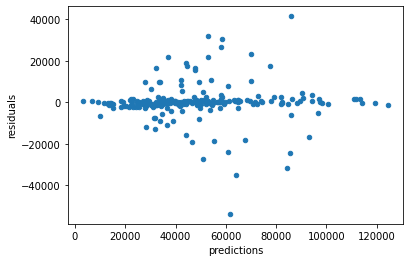

CPU times: user 451 ms, sys: 224 ms, total: 674 ms
Wall time: 2.62 s


In [0]:
#Gradient Boosting Regressor for F4P

X = attendance_f4p.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'concession_rev_bnb', 'concession_rev_f4p', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance_f4p.concession_rev_f4p
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
gbr = GradientBoostingRegressor(n_estimators=300)
%time evaluate(gbr)
##R^2 = 0.53198

In [0]:
%time gbr_gs()


{'learning_rate': 0.15, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300} 0.6395622846067975
CPU times: user 1min 2s, sys: 1.13 s, total: 1min 3s
Wall time: 26min 14s


R^2 score: 0.5065637427343187
Cross Validation Score: 0.37559 ± 0.22162
Model Performance
Average Error: 12310.6260 degrees.
Accuracy = 63.01%.


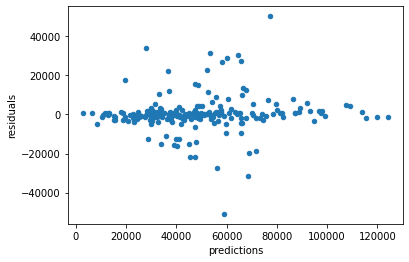

CPU times: user 305 ms, sys: 107 ms, total: 412 ms
Wall time: 629 ms


In [0]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_features= 3, max_depth=3, min_samples_leaf= 1, min_samples_split= 3, learning_rate=0.15)
%time evaluate(gbr2)

##R^2 = 0.68651 (n_estimators=400, max_features= 'sqrt', max_depth=6, min_samples_leaf= 1, min_samples_split= 3, learning_rate=0.1)
##R^2 = 0.68651 (n_estimators=100, max_features= 'sqrt', max_depth=4, min_samples_leaf= 3, min_samples_split= 3, learning_rate=0.1)

In [0]:
gbr2_featimp = feat_imp(gbr2)


                          index  importance
0              DayName_Saturday    0.133603
1             Team_CHICAGO CUBS    0.093132
2                       Win_pct    0.081820
3                          Wins    0.073495
4   Season Rolling Average Runs    0.065662
5               DayName_Tuesday    0.053909
6                          TMIN    0.046578
7                      temp_avg    0.043511
8                MonthName_July    0.042535
9                        Losses    0.031884
10          Team_BOSTON RED SOX    0.029927
11                         TMAX    0.027845
12                         PRCP    0.026288
13               DayName_Monday    0.022883
14                    f4p_y_n_1    0.015141
15          Team_TAMPA BAY RAYS    0.014802
16          MonthName_September    0.014722
17               DayName_Sunday    0.014663
18      Team_KANSAS CITY ROYALS    0.014238
19            DayName_Wednesday    0.012911
20                       Season    0.011865
21       Team_OAKLAND ATHLETICS 

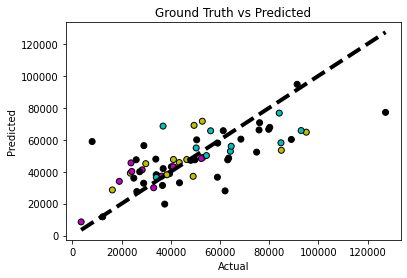

In [0]:
df = ss.inverse_transform(X_test)
df = pd.DataFrame(df)      
df[54] = np.where(df[53]==1,'y','k') ##bleachers and brews
df[55] = np.where(df[51]==1,'r','k') ##f4p 

def f(row):
    if row[54] == 'y':
        if row[55] == 'r':
          val = 'y' ##both
        else:
          val = 'm' ##bnb
    elif row[55] == 'r':
        val = 'c'  ## f4P
    else:
        val = 'k'
    return val

df[56] = df.apply(f,axis =1)

colors = df[56]

y_predicted = gbr2.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, c=colors,edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


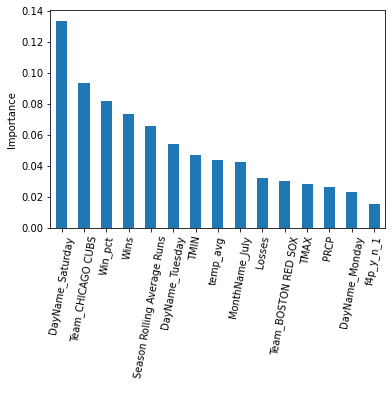

In [0]:
gbr2_featimp[0:15].plot(x='index', y='importance', kind='bar',rot=80)
# plt.title('Feature Importances', fontsize=25)
plt.xlabel('   ')
plt.ylabel('Importance')
plt.legend().set_visible(False)